**kidney_disease**

In [143]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [144]:
#Load dataset
df = pd.read_csv("/content/kidney_disease.csv")

In [145]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [146]:
df.shape

(400, 26)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [148]:
# checking for missing values
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [149]:
# Fill NaN values in numerical columns with the mean (or median)
numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

# Using mean to fill NaN values
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

In [150]:
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Using mode to fill NaN values
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [151]:
# checking for missing values
df.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [152]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [153]:
#LabelEncoder Method
from sklearn.preprocessing import LabelEncoder

categorical_col = df.select_dtypes(include='object').columns

In [154]:
categorical_col

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [155]:
encoders = {}

for col in categorical_col:
  encoders[col] = LabelEncoder()
  df[col] = encoders[col].fit_transform(df[col])

In [156]:
encoders

{'rbc': LabelEncoder(),
 'pc': LabelEncoder(),
 'pcc': LabelEncoder(),
 'ba': LabelEncoder(),
 'pcv': LabelEncoder(),
 'wc': LabelEncoder(),
 'rc': LabelEncoder(),
 'htn': LabelEncoder(),
 'dm': LabelEncoder(),
 'cad': LabelEncoder(),
 'appet': LabelEncoder(),
 'pe': LabelEncoder(),
 'ane': LabelEncoder(),
 'classification': LabelEncoder()}

**Logistic Regression**

In [157]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,33,59,27,0,0,0,0,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,40,69,40,0,0,0,0,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,58,32,0,0,0,0,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,37,64,37,0,0,0,0,0,0,1


In [158]:
df.shape

(400, 26)

In [159]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
#x = df['age'].values.reshape(-1, 1)
x = df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']].values
y = df['classification'].values

In [160]:
x = df.drop(['classification'], axis=1)
y = df['classification']

In [161]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [162]:
#load a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [163]:
lr.score(x_test,y_test)

0.9875

**StandardScaler**

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train)

lr.score(x_test_scaled,y_test)

1.0

In [165]:
lr.score(x_test_scaled,y_test)

1.0

**cross_val_score**

In [166]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation to check model performance
cv_scores = cross_val_score(lr, x_test_scaled, y_test, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")


Cross-validation scores: [0.9375 1.     1.     1.     1.    ]
Mean CV score: 0.9875


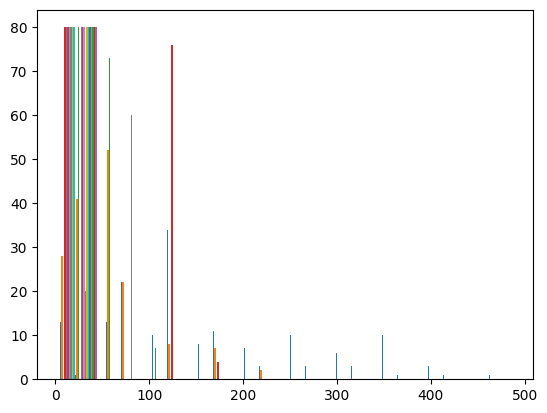

In [167]:
plt.hist(x_test)
plt.show()

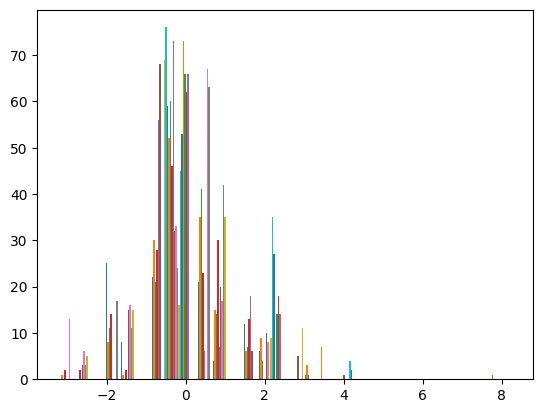

In [168]:
plt.hist(x_test_scaled)
plt.show()

**RandomForestClassifier**

In [169]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [170]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [171]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [172]:
import pickle
filename = 'kidney_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [173]:
liver_model = pickle.load(open('kidney_model.pkl', 'rb'))